In [4]:
user_ages = [10, 18, 21, 35, 42, 27, 12, 16]
print(*filter(lambda x: x > 18, user_ages))


21 35 42 27


In [5]:
workers = [['Ivan', 'Ivanov', 100000, 2], ['Petr', 'Petrov', 150000, 2], ['Sidor', 'Sidorov', 200000, 3]]
positions = ['junior', 'middle', 'senior']
for worker in workers:
    if worker[3] < 2:
        position = positions[0]
    elif worker[3] >= 2 and worker[3] < 5:
        position = positions[1]
    elif worker[3] > 5:
        position = positions[2]
    status = "{name} {sur} is {pos}"
    print(status.format(name=worker[0], sur=worker[1], pos=position))

Ivan Ivanov is middle
Petr Petrov is middle
Sidor Sidorov is middle


In [6]:
values = [10, 18, 21, 35, 42, 27, 12, 16]
tens = filter(lambda x: x % 10 == 0, values)
tens

In [7]:
import pandas as pd

In [8]:
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/360340/2_taxi_nyc.csv')

In [9]:
taxi.shape

(29101, 14)

In [10]:
taxi.dtypes

pickup_dt        object
pickup_month     object
borough          object
pickups           int64
hday             object
spd             float64
vsb             float64
temp            float64
dewp            float64
slp             float64
pcp 01          float64
pcp 06          float64
pcp 24          float64
sd              float64
dtype: object

In [11]:
taxi.rename(columns={'pcp 01': 'pcp_01', 'pcp 06': 'pcp_06', 'pcp 24': 'pcp_24'}, inplace=True)

In [12]:
taxi

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp_01,pcp_06,pcp_24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29096,2015-06-30 23:00:00,Jun,EWR,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29097,2015-06-30 23:00:00,Jun,Manhattan,3828,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29098,2015-06-30 23:00:00,Jun,Queens,580,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0
29099,2015-06-30 23:00:00,Jun,Staten Island,0,N,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0


In [13]:
taxi[taxi['borough'] == 'Brooklyn'].count()

pickup_dt       4343
pickup_month    4343
borough         4343
pickups         4343
hday            4343
spd             4343
vsb             4343
temp            4343
dewp            4343
slp             4343
pcp_01          4343
pcp_06          4343
pcp_24          4343
sd              4343
dtype: int64

In [14]:
taxi.pickups.sum()

14265773

In [15]:
taxi \
    .groupby('borough') \
    .aggregate({'pickups': 'sum'}).sort_values(by='pickups')

,pickups
borough,
EWR,105
Staten Island,6957
Bronx,220047
Queens,1343528
Brooklyn,2321035
Manhattan,10367841


In [16]:
min_pickups = taxi \
                .groupby('borough') \
                .aggregate({'pickups': 'sum'}) \
                .idxmin()
min_pickups

pickups    EWR
dtype: object

In [17]:
taxi \
    .groupby(['borough', 'hday']) \
    .aggregate({'pickups': 'mean'})

pickups
borough       hday             
Bronx         N       50.771073
              Y       48.065868
Brooklyn      N      534.727969
              Y      527.011976
EWR           N        0.023467
              Y        0.041916
Manhattan     N     2401.302921
              Y     2035.928144
Queens        N      308.899904
              Y      320.730539
Staten Island N        1.606082
              Y        1.497006

In [18]:
pickups_by_mon_bor = taxi \
                        .groupby(['borough', 'pickup_month'], as_index=False) \
                        .aggregate({'pickups': 'sum'}) \
                        .sort_values(by='pickups',ascending=False)
pickups_by_mon_bor.head()

,borough,pickup_month,pickups
21,Manhattan,Jun,1995388
23,Manhattan,May,1888800
19,Manhattan,Feb,1718571
22,Manhattan,Mar,1661261
18,Manhattan,Apr,1648278


In [19]:
temps = taxi.temp


def temp_to_celcius(temps):
    return pd.Series((temps - 32) * 5 / 9)


temp_to_celcius(temps)


0        -1.111111
1        -1.111111
2        -1.111111
3        -1.111111
4        -1.111111
           ...    
29096    23.888889
29097    23.888889
29098    23.888889
29099    23.888889
29100    23.888889
Name: temp, Length: 29101, dtype: float64

In [30]:
lesson3_df = pd.read_csv('https://stepik.org/media/attachments/lesson/383523/lesson_3_data__1_.csv', encoding='windows-1251')
lesson3_df

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48124,5142333,660820070702005033693,6608,2007/07/02,0.575660,45518841,4551884,22115,101070640100,1010706401,...,10107064,10107,101,1,0.71,1.0,22115,FIDEOS 0 500 G Brand_4,PASTA ALIMENTICIA SE,pasta
48125,5142335,660820070618006015969,6608,2007/06/18,0.829954,110824211,11082421,22124,101070640100,1010706401,...,10107064,10107,101,1,0.71,1.0,22124,PLUMAS 3 500 G Brand_4,PASTA ALIMENTICIA SE,pasta
48126,5150526,670120071110001433949,6701,2007/11/10,0.384120,1408670389,999860498,21818,101070640100,1010706401,...,10107064,10107,101,1,0.48,1.0,21818,MACARRONES 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
48127,5150527,670120071110001433949,6701,2007/11/10,0.384120,1408670389,999860498,21814,101070640100,1010706401,...,10107064,10107,101,1,0.48,1.0,21814,SPAGHETTI 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta


In [36]:
string = 'GFIIS GPA, SHEYCGUMO XJPAV, TKWXX LMEDCNL, HAZERTNEH LA, POS MSEMNZNX, AEEF I, VYMBZ LKW, OFZWIERB BTDRNH, GP E, G IANCYMP, LEMJQ JLQOAOUR, EIO SEIZRLLSZ, IGSBOUMOP QNYNOG, U RWTFM, JEC HANKDE, Q BJW, IMIAKTQG WYNKYRV, ZHHRKPZ XZTCKWZAC, GURCMSVWD ASYPOJER, LIYKSZ H, UIZDPTWFT ZSWZUQV, QCMLDKC UQNYAHKV, TWGRKZT AO, GBTK JZ, QVSQDVE WASZKY, HBFJY MTCQYFA, NFKFTSN PBMOCR, DJHXY RNVFFLGNR, VCZ U, NENKAXZN CFUZZC, JJH PJHPINIAP, AJSAKMUD REIKM, CI QQ, Y LUPLT, OHE FVODOEXWP, BSYSIYDXF UYOWYN, CDBP MKWOU, TPFNYDT RROI, GSMU DWGKUFC, TYZEQXPND Q, C SYJNKITW, UU CYYIFZA, Z DOIGKRO, JEWNUVDZ WYUWIXL, EBXBNBIIN KYQHJUP, FJZYFQLX YUONSVE, OJMJOF UHYSY, WK YKMM, FOSYOJSNS XXIKIAQJB, CUESV MHQL, QV VPMZIG, GURI XZAVPJLPD, KWOIM IEWZE, HVO NLW, QYAKHQN VZBN, HVXZSO GNUE, WAGYI JOAZKHLYV, FUBNJDXJV KSH, QAJN X, SJ ARHBJO, JQPOHVCS AWEVLE, AAI OOEZ, NWELRLKKU BBAOFWVZX, EBY WDFNLRASS, VRBVKWS TAVCXHSA, BX PPJY, CHGHISSY F, IBQB YQ, YAJ KF, AXIT XTUMPAOK, ELCBKCQW W, G CAOJOKF, IYBQFQQA U, B GGKPBXXS, EVCWX SST, RVVM GROJL, CPOHBKVTM RMPIFGN, MFZGW XAYCGGYZI, UKCDG TMUGJEG, JBTOMR MFORFO, WX TSCGTJUU, ZKZZNU FZCBQAB, HYB WZ, FT MIMOKBIEM, SNRE OTU, Y VYFV, CNCGULVO MBHGPYW, QWCV XQPJ, IF SHXUQCTY, PVVDP RJOCHKE, OMBL D, OF OGEJYXWB, VTHWR QHYZDD, TV AUHV, L A, S MHIWOOCMD, UTVM J, IIM IK, CZJNYPG RA, QGKCTQV JVPGTRDXH'
# list(map(str.strip, string.split(',')))

In [41]:
lesson3_df.query('fam_en == "pasta" and cta > 2849184')

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta
5,1247,120070908003099509,1,2007/09/08,0.812326,93265591,9326559,159871,101070640100,1010706401,...,10107064,10107,101,1,1.29,1.0,159871,SPAGUETI PLATOS 500 G Brand_2,PASTA ALIMENTICIA SE,pasta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48124,5142333,660820070702005033693,6608,2007/07/02,0.575660,45518841,4551884,22115,101070640100,1010706401,...,10107064,10107,101,1,0.71,1.0,22115,FIDEOS 0 500 G Brand_4,PASTA ALIMENTICIA SE,pasta
48125,5142335,660820070618006015969,6608,2007/06/18,0.829954,110824211,11082421,22124,101070640100,1010706401,...,10107064,10107,101,1,0.71,1.0,22124,PLUMAS 3 500 G Brand_4,PASTA ALIMENTICIA SE,pasta
48126,5150526,670120071110001433949,6701,2007/11/10,0.384120,1408670389,999860498,21818,101070640100,1010706401,...,10107064,10107,101,1,0.48,1.0,21818,MACARRONES 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
48127,5150527,670120071110001433949,6701,2007/11/10,0.384120,1408670389,999860498,21814,101070640100,1010706401,...,10107064,10107,101,1,0.48,1.0,21814,SPAGHETTI 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta


In [43]:
pd.Series(lesson3_df.nunique())

Unnamed: 0      48129
tk              37044
pl                498
dia               185
hs              23767
tc              11764
cta             10827
id_art             59
id_subsubfam        1
id_subfam           1
id_fam              1
id_famn             1
id_seccion          1
id_subagr           1
id_agr              1
vta               217
uni                19
id_artn            59
art_sp             59
fam_sp              1
fam_en              1
dtype: int64

In [44]:
peru_taxi_df = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', encoding='windows-1251',
                          sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])
peru_taxi_df

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [68]:
(peru_taxi_df.groupby('source')['source'].value_counts() / peru_taxi_df.shape[0] * 100).apply(int)

source   source 
Android  Android    21
Wap      Wap         0
iPad     iPad        2
iPhone   iPhone     42
web      web        33
Name: source, dtype: int64

<AxesSubplot:xlabel='source'>

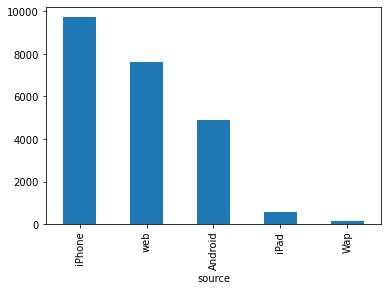

In [84]:
peru_taxi_df.groupby('source')['journey_id'].count().sort_values(ascending=False).plot(kind='bar')

In [85]:
import seaborn as sns

C:\Users\DarkstalkeR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='icon', ylabel='count'>

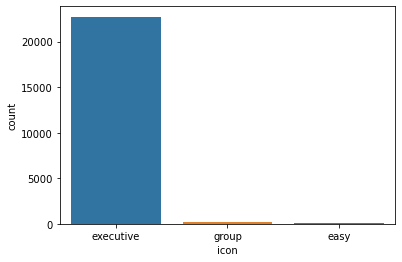

In [87]:
sns.countplot(peru_taxi_df['icon'])

C:\Users\DarkstalkeR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='source', ylabel='count'>

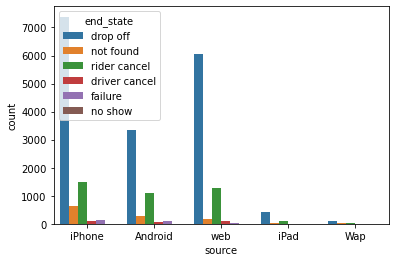

In [88]:
sns.countplot(peru_taxi_df['source'], hue=peru_taxi_df['end_state'])

In [102]:
driver_score_counts = (peru_taxi_df.groupby('driver_score').agg({'journey_id': 'count'}) / peru_taxi_df.shape[0])\
                                    .mul(100) \
                                    .round(2) \
                                    .reset_index() \
                                    .rename(columns={'journey_id': 'percentage'}) \
                                    .sort_values(by='driver_score')

,driver_score,percentage
0,0.0,4.73
1,1.0,0.41
2,2.0,0.27
3,3.0,0.98
4,4.0,7.24
5,5.0,19.47


In [96]:
peru_taxi_df.driv

Index(['journey_id', 'user_id', 'driver_id', 'taxi_id', 'icon', 'start_type',
       'start_at', 'start_lat', 'start_lon', 'end_at', 'end_lat', 'end_lon',
       'end_state', 'driver_start_lat', 'driver_start_lon', 'arrived_at',
       'source', 'driver_score', 'rider_score'],
      dtype='object')

In [112]:
driver_score_counts = peru_taxi_df.driver_score.value_counts(normalize=True).mul(100).round(2) \
                .reset_index().rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
                .sort_values(by='driver_score')

In [111]:
import matplotlib.pyplot as plt

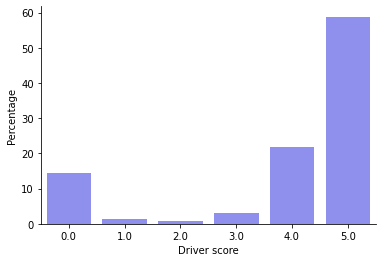

In [114]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [120]:
rider_score_counts = peru_taxi_df.rider_score.value_counts(normalize=True).mul(100).round(2) \
            .reset_index() \
            .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
            .sort_values(by='rider_score')

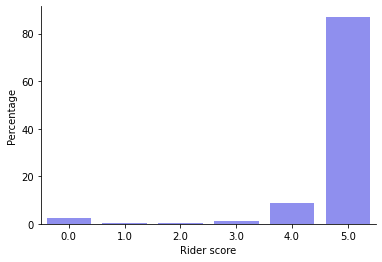

In [125]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()